# Explore here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency, f_oneway

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

import joblib

In [2]:
df = pd.read_csv("../data/raw/bank-marketing-campaign-data.csv", delimiter=";")

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Check and drop duplicates since we don't have a use for them for this analysis.

In [4]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

12


Let's analyse the distribution in our numerical data

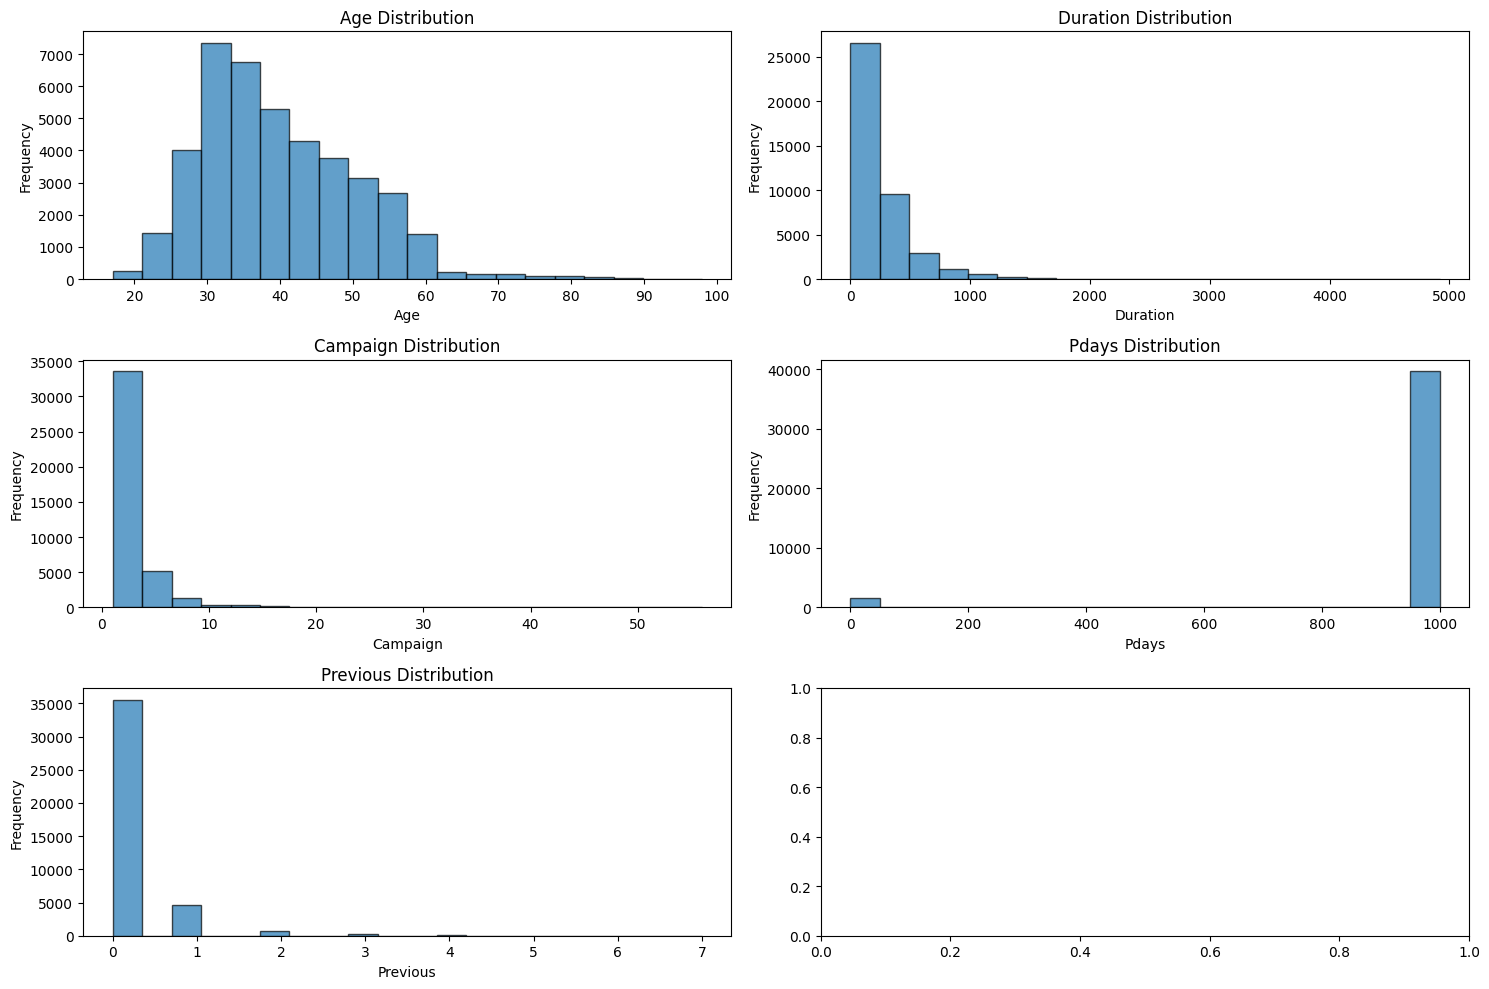

In [5]:
fig, axes = plt.subplots(3, 2, figsize=(15,10))

# Histogram for 'age'
axes[0, 0].hist(df['age'], bins=20, edgecolor='k', alpha=0.7)
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Histogram for 'duration'
axes[0, 1].hist(df['duration'], bins=20, edgecolor='k', alpha=0.7)
axes[0, 1].set_title('Duration Distribution')
axes[0, 1].set_xlabel('Duration')
axes[0, 1].set_ylabel('Frequency')

# Histogram for 'campaign'
axes[1, 0].hist(df['campaign'], bins=20, edgecolor='k', alpha=0.7)
axes[1, 0].set_title('Campaign Distribution')
axes[1, 0].set_xlabel('Campaign')
axes[1, 0].set_ylabel('Frequency')

# Histogram for 'pdays'
axes[1, 1].hist(df['pdays'], bins=20, edgecolor='k', alpha=0.7)
axes[1, 1].set_title('Pdays Distribution')
axes[1, 1].set_xlabel('Pdays')
axes[1, 1].set_ylabel('Frequency')

# Histogram for 'previous'
axes[2, 0].hist(df['previous'], bins=20, edgecolor='k', alpha=0.7)
axes[2, 0].set_title('Previous Distribution')
axes[2, 0].set_xlabel('Previous')
axes[2, 0].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**Age:** Most of our customers are between 30-50 years old.

**Duration:** Most of the calls are short which is common.

**Campaign** Most people were contacted 0 times

**Pdays:** Most people has not been contacted recently, which correlates with our analysis of Campaign.

**Previous:** Most people didn't get any contact in the previous campaign.

Now we'll analyse the distribution in our categorical data

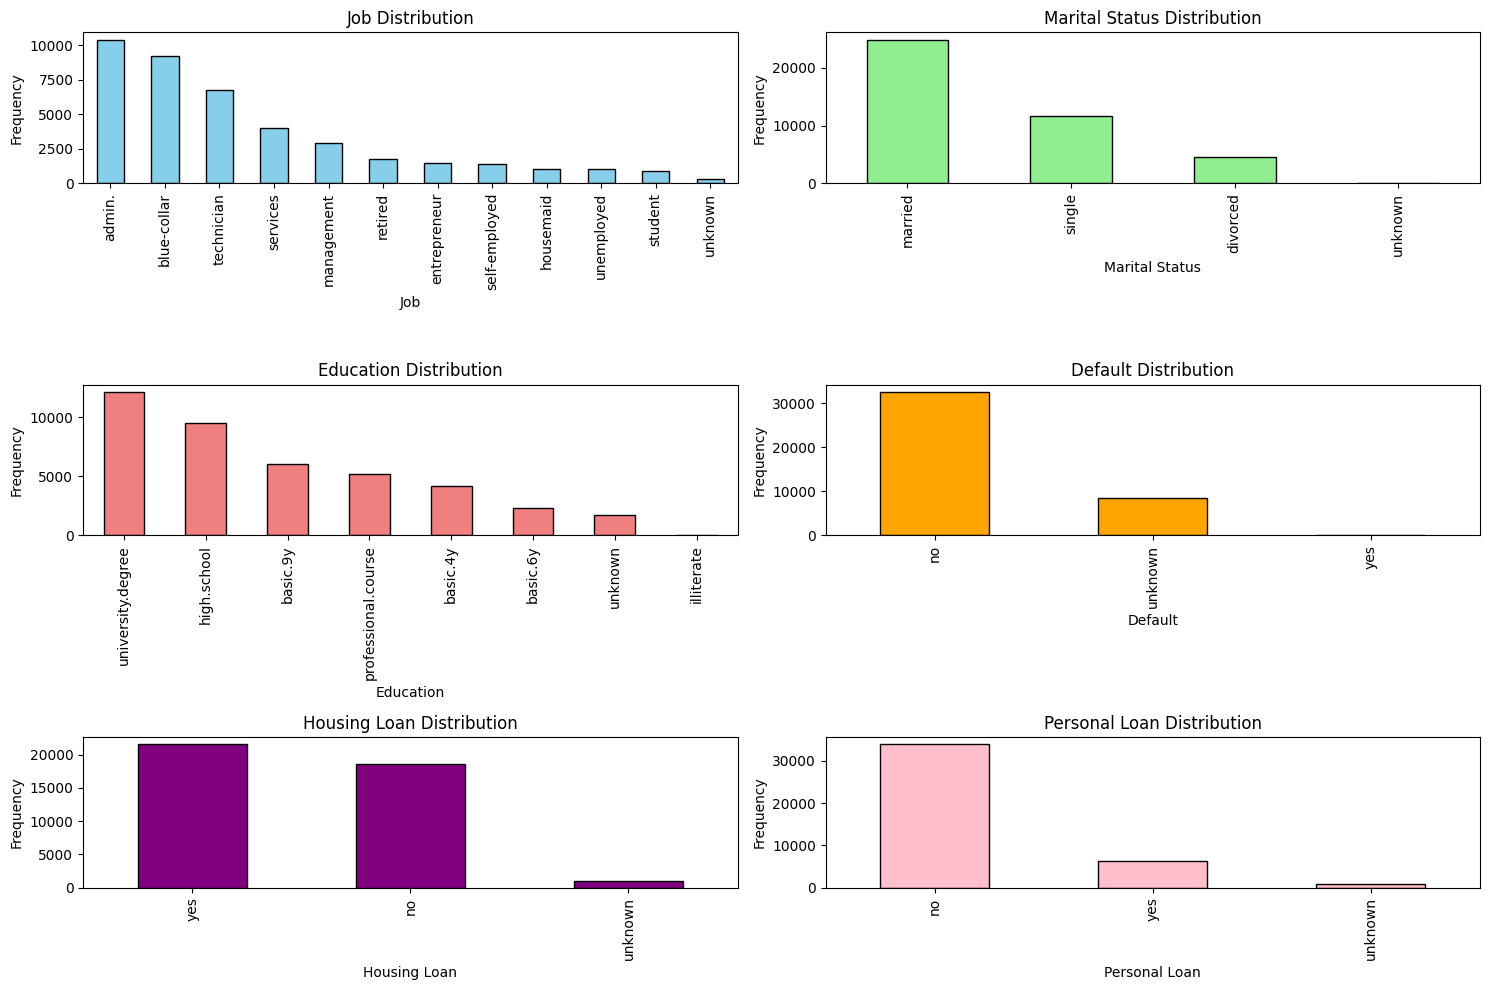

In [6]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

# Bar plot for 'job'
df['job'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue', edgecolor='k')
axes[0, 0].set_title('Job Distribution')
axes[0, 0].set_xlabel('Job')
axes[0, 0].set_ylabel('Frequency')

# Bar plot for 'marital'
df['marital'].value_counts().plot(kind='bar', ax=axes[0, 1], color='lightgreen', edgecolor='k')
axes[0, 1].set_title('Marital Status Distribution')
axes[0, 1].set_xlabel('Marital Status')
axes[0, 1].set_ylabel('Frequency')

# Bar plot for 'education'
df['education'].value_counts().plot(kind='bar', ax=axes[1, 0], color='lightcoral', edgecolor='k')
axes[1, 0].set_title('Education Distribution')
axes[1, 0].set_xlabel('Education')
axes[1, 0].set_ylabel('Frequency')

# Bar plot for 'default'
df['default'].value_counts().plot(kind='bar', ax=axes[1, 1], color='orange', edgecolor='k')
axes[1, 1].set_title('Default Distribution')
axes[1, 1].set_xlabel('Default')
axes[1, 1].set_ylabel('Frequency')

# Bar plot for 'housing'
df['housing'].value_counts().plot(kind='bar', ax=axes[2, 0], color='purple', edgecolor='k')
axes[2, 0].set_title('Housing Loan Distribution')
axes[2, 0].set_xlabel('Housing Loan')
axes[2, 0].set_ylabel('Frequency')

# Bar plot for 'loan'
df['loan'].value_counts().plot(kind='bar', ax=axes[2, 1], color='pink', edgecolor='k')
axes[2, 1].set_title('Personal Loan Distribution')
axes[2, 1].set_xlabel('Personal Loan')
axes[2, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**Job:** Few customers are students, unemployed or housemaids. Most of them are in administrative jobs or blue collars.

**Marital:** Most customers are married

**Education:** Most customers do have a university degree or high school education

**Default:** Most customers do not have a default history

**House Loan:** It's fairly even between the customers that do have a house loan or do not.

**Personal Loan:** Most customers do not have a personal loan.

In [7]:
# Check count for minorities that are not visually represented in the plot
print(f"Default column with value yes count: {df['default'][df['default'] == 'yes'].count()}")
print(f"Marital column with value unknown count: {df['marital'][df['marital'] == 'unknown'].count()}")
print(f"Education column with value illiterate count: {df['education'][df['education'] == 'illiterate'].count()}")

Default column with value yes count: 3
Marital column with value unknown count: 80
Education column with value illiterate count: 18


Now that we know our data distribution let's analyse how it correlates with economic indicators to gain deeper insights and learn about the relationships of our data. This will help us when we're feature modeling later on.

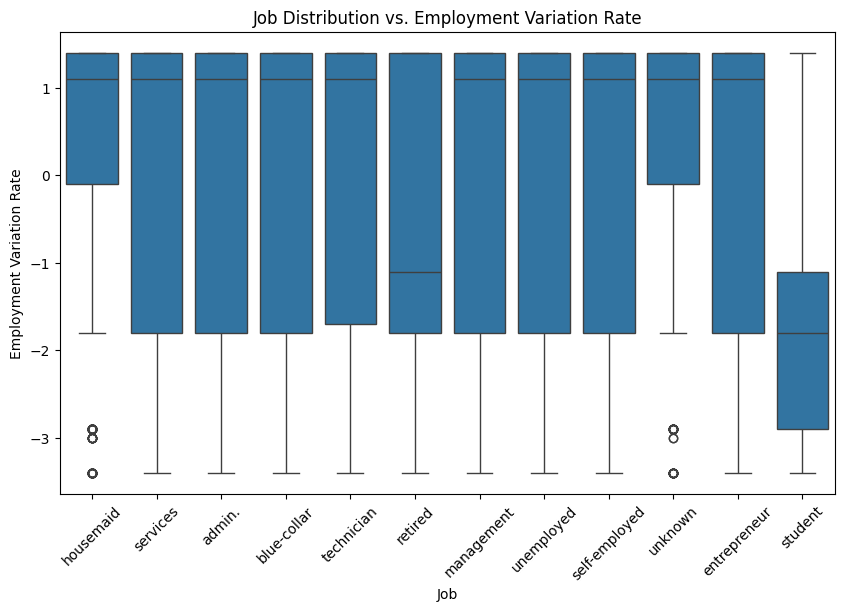

In [8]:
# Job distribution vs employment variation rate
plt.figure(figsize=(10, 6))
sns.boxplot(x='job', y='emp.var.rate', data=df)
plt.title('Job Distribution vs. Employment Variation Rate')
plt.xlabel('Job')
plt.ylabel('Employment Variation Rate')
plt.xticks(rotation=45)
plt.show()



Employment variaton rate is centered around a narrow range for most job categories with a few exceptions (housemaid, student).

- housemaid: Shows a higher median employment variaton rate but has some outliers on the lower end.
- student: Has a wider spread with a lower median employment variation rate compared to others showcasing its variability.

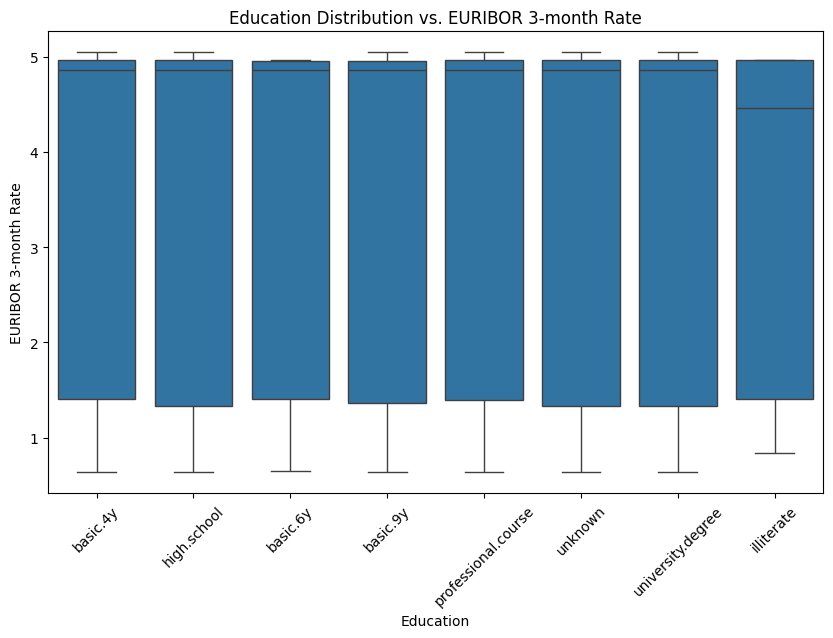

In [9]:
# Education distribution vs EURIBOR 3-month rate
plt.figure(figsize=(10, 6))
sns.boxplot(x='education', y='euribor3m', data=df)
plt.title('Education Distribution vs. EURIBOR 3-month Rate')
plt.xlabel('Education')
plt.ylabel('EURIBOR 3-month Rate')
plt.xticks(rotation=45)
plt.show()

The median EURIBOR 3-month rate appears to be consistent across different education levels but we can see that the 'illiterate' group has a slightly higher median than the other groups.

Since it's fairly consistent across education levels, we can understand that it impacts all educational groups similarly.

We can also apply Statistical Tests to our data to quantify the strength of the relationships we just analyzed.

In [10]:
# Chi-square test for independence between job and default status
contingency_table = pd.crosstab(df['job'], df['default'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test for job vs. default: chi2={chi2}, p-value={p}")

# ANOVA test for emp.var.rate between different education levels
grouped_data = [df[df['education'] == edu]['emp.var.rate'] for edu in df['education'].unique()]
f_stat, p_val = f_oneway(*grouped_data)
print(f"ANOVA test for education vs. emp.var.rate: F-statistic={f_stat}, p-value={p_val}")

Chi-square test for job vs. default: chi2=1926.7521760090497, p-value=0.0
ANOVA test for education vs. emp.var.rate: F-statistic=21.777045071774587, p-value=1.4233681931376023e-29


Chi-square value being that high with a almost effectively zerop p-value indicates a very strong association between job categories and default status, implying that the job category influences the likelihood of default and suggesting that some job types are more likely to default than others.

Now that we have an idea about the relationships in our data. Let's analyse the distribution of our data in relation to our target 'y'

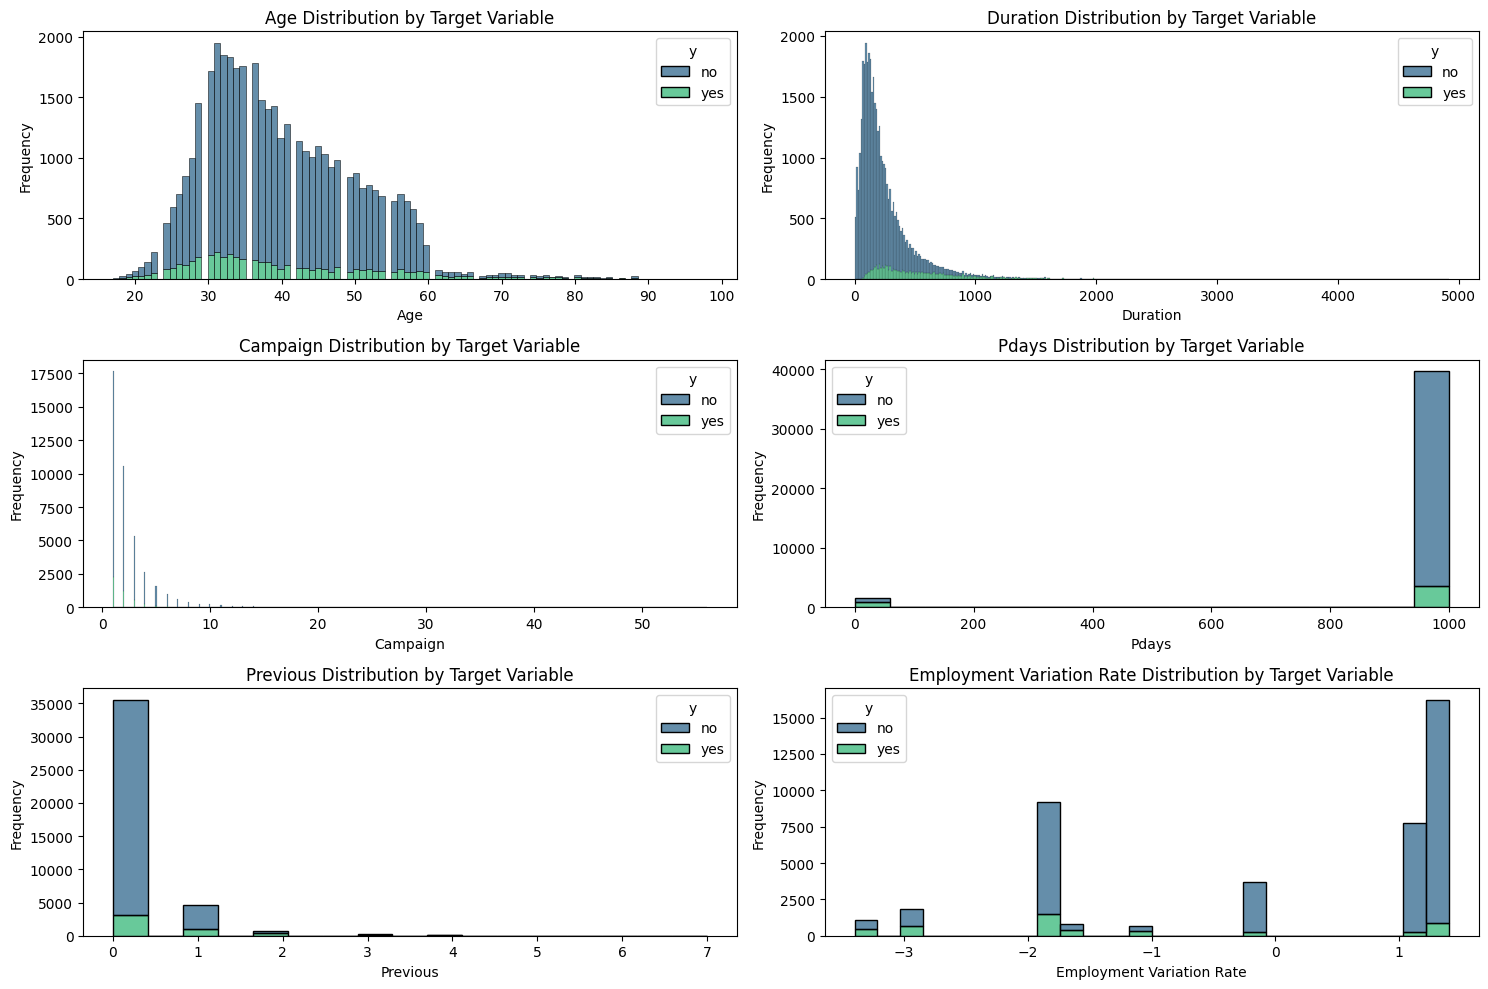

In [11]:
# Distribution of numerical features by the target variable 'y'
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

# Distribution of 'age' by 'y'
sns.histplot(df, x='age', hue='y', multiple='stack', ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Age Distribution by Target Variable')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Distribution of 'duration' by 'y'
sns.histplot(df, x='duration', hue='y', multiple='stack', ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Duration Distribution by Target Variable')
axes[0, 1].set_xlabel('Duration')
axes[0, 1].set_ylabel('Frequency')

# Distribution of 'campaign' by 'y'
sns.histplot(df, x='campaign', hue='y', multiple='stack', ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Campaign Distribution by Target Variable')
axes[1, 0].set_xlabel('Campaign')
axes[1, 0].set_ylabel('Frequency')

# Distribution of 'pdays' by 'y'
sns.histplot(df, x='pdays', hue='y', multiple='stack', ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Pdays Distribution by Target Variable')
axes[1, 1].set_xlabel('Pdays')
axes[1, 1].set_ylabel('Frequency')

# Distribution of 'previous' by 'y'
sns.histplot(df, x='previous', hue='y', multiple='stack', ax=axes[2, 0], palette='viridis')
axes[2, 0].set_title('Previous Distribution by Target Variable')
axes[2, 0].set_xlabel('Previous')
axes[2, 0].set_ylabel('Frequency')

# Distribution of 'emp.var.rate' by 'y'
sns.histplot(df, x='emp.var.rate', hue='y', multiple='stack', ax=axes[2, 1], palette='viridis')
axes[2, 1].set_title('Employment Variation Rate Distribution by Target Variable')
axes[2, 1].set_xlabel('Employment Variation Rate')
axes[2, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The first thing we can see is that there's a large imbalance between the amount of "no" and "yes". We'll need to address it later on during modeling. For now, let's focus on each plot:

**Age:** The 'yes' category is predominant between the 30-40y range which suggests that this age group may be more receptive for the target outcome. It could also be only due to being the most predomintant range.

**Duration:** Longer durations are associated with a high proportion of 'yes' outcomes. Longer engagement time might possitively influence the target outcome.

**Campaign:** The 'yes' category appears more frequently at lower campaign counts. Repeated contact beyond a certain point might not longer be effective.

**Pdays:** The 'yes' category appears much more frequently when there's no recent contact, which correlates with our Campaign assesment.

**Previous:** The 'yes' category appear more frequently at lower frequency counts. Which also suggests that, while some prior engagement might be beneficial, too many might no be effective. Correlates with our assesment of Campaign and Pdays.

**Employment Variaton Rate:** The 'yes' category is more frequent at higher rates, possitive economic conditions may favor achieving the target.


Let's check which % of campaigns are being directed to the 30-40 years old age group.

In [12]:
# Filter the data
age_filtered = df[(df['age'] >= 30) & (df['age'] <= 40)]

# Calculate percentage
total_campaigns = df.shape[0]
target_age_campaigns = age_filtered.shape[0]
percentage_target_age = (target_age_campaigns / total_campaigns) * 100

percentage_target_age

43.94307363512726

# Feature Engineering

In [13]:
# Encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan'], drop_first=True)
df_encoded.head()


,age,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,...,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes
0,56,telephone,may,mon,261,1,999,0,nonexistent,1.1,...,0,0,0,0,0,0,0,0,0,0
1,57,telephone,may,mon,149,1,999,0,nonexistent,1.1,...,0,0,0,0,1,0,0,0,0,0
2,37,telephone,may,mon,226,1,999,0,nonexistent,1.1,...,0,0,0,0,0,0,0,1,0,0
3,40,telephone,may,mon,151,1,999,0,nonexistent,1.1,...,0,0,0,0,0,0,0,0,0,0
4,56,telephone,may,mon,307,1,999,0,nonexistent,1.1,...,0,0,0,0,0,0,0,0,0,1


Capture age ranges that showed different likehoods during our analysis

In [14]:
# Create age groups
df_encoded['age_group'] = pd.cut(df_encoded['age'], bins=[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100], \
 labels=['20-25','25-30', '30-35', '35-40', '40-45', '45-50','50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '85-90', '90-95', '95-100'])

# One-hot encoding the age groups
df_encoded = pd.get_dummies(df_encoded, columns=['age_group'], drop_first = True)

Distingish between recent and long-term contacts based on the previous analysis of pdays

In [15]:
# Contact timing features
df_encoded['recent_contact'] = df_encoded['pdays'].apply(lambda x: 1 if x < 100 else 0)
df_encoded['long_term_follow_up'] = df_encoded['pdays'].apply(lambda x: 1 if x > 900 else 0)

Capture combined economic effect indicators that might affect customer behavior

In [16]:
# Economic conditions interaction
df_encoded['emp_var_rate_cons_price_idx'] = df_encoded['emp.var.rate'] * df_encoded['cons.price.idx']
df_encoded['emp_var_rate_euribor3m'] = df_encoded['emp.var.rate'] * df_encoded['euribor3m']

Capture overall intensity of contact efforts

In [17]:
# Engagement intensity
df_encoded['engagement_intensity'] = df_encoded['campaign'] + df_encoded['previous']

Average duration per contact to assess effiency of calls

In [18]:
# Call effectiveness
df_encoded['call_effectiveness'] = df_encoded['duration'] / df_encoded['campaign']

In [19]:
# Normalize numerical features
numerical_features = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
                      'emp_var_rate_cons_price_idx', 'emp_var_rate_euribor3m', 'engagement_intensity', 'call_effectiveness']
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

In [20]:
# Encoding target column and dropping object columns
df_encoded['y'] = df_encoded['y'].map({'yes': True, 'no': False})
df_encoded = df_encoded.select_dtypes(exclude='object')

In [21]:
df_encoded.to_csv('../data/processed/data_processed.csv')

In [22]:
# Splitting the data 
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Building and training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

In [24]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.90
Precision: 0.66
Recall: 0.39
Confusion Matrix:
[[7072  193]
 [ 590  381]]
Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.97      0.95      7265
        True       0.66      0.39      0.49       971

    accuracy                           0.90      8236
   macro avg       0.79      0.68      0.72      8236
weighted avg       0.89      0.90      0.89      8236



In [25]:
# Save model
joblib.dump(model, '../models/logistic_regression_model.pkl')

['../models/logistic_regression_model.pkl']

We can see that althought the Accuracy is high, the precision is lower and the recall is bad. 
- Low precision indicates that there **is** be an imbalance on the dataset, with more target instances being negative than positive. We already know that since we found about it during our analysis.
- Low recall indicates that the model is not identifing correctly the true positives in our data.

Let's apply some resampling techniques to attempt to balance the model and improve the recall.

In [26]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [27]:
# Train the logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = model.predict(X_test)


In [28]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.89
Precision: 0.56
Recall: 0.51
Confusion Matrix:
[[6873  392]
 [ 473  498]]
Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.95      0.94      7265
        True       0.56      0.51      0.54       971

    accuracy                           0.89      8236
   macro avg       0.75      0.73      0.74      8236
weighted avg       0.89      0.89      0.89      8236



- The recall for the minority class 'yes' improved significantly, meaning the model is better at identifying true positives.
- The precision for the minority class dropped, indicating more false positives.

The overall performance is more balanced between precision and recall for the minority class.

In [29]:
# Save model
joblib.dump(model, '../models/logistic_regression_model_smote.pkl')

['../models/logistic_regression_model_smote.pkl']